# Predicting House Price

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split



In [2]:
#Loading Dataset
df = pd.read_csv("data.csv")
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


### date: The date when the property information was recorded or made available.
### price: The price of the property.
### bedrooms: The number of bedrooms in the property.
### bathrooms: The number of bathrooms in the property.
### sqft_living: The total living area size of the property in square feet.
### sqft_lot: The total size of the lot or land associated with the property in square feet.
### floors: The number of floors in the property.
### waterfront: A binary indicator (1 or 0) specifying whether the property has a waterfront or not.
### view: A measure or rating indicating the view from the property.
### condition: The overall condition of the property, typically on a numerical scale.
### sqft_above: The size of the living area above ground level in square feet.
### sqft_basement: The size of the basement area in square feet.
### yr_built: The year when the property was originally built.
### yr_renovated: The year when the property was last renovated, if applicable.
### street: The street address of the property.
### city: The city where the property is located.
### statezip: The state and ZIP code of the property.
### country: The country where the property is located.

In [3]:
# Checking shape of the dataset
df.shape

(4600, 18)

In [4]:
df.sample(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2518,2014-06-14 00:00:00,496752.0,2.0,1.00,1980,5000,1.0,0,0,4,1090,890,1923,0,1908 29th Ave S,Seattle,WA 98144,USA
3438,2014-06-26 00:00:00,435000.0,4.0,2.75,2110,8751,1.0,0,0,3,1510,600,1962,2003,18447-18509 94th Ave NE,Bothell,WA 98011,USA
1644,2014-05-30 00:00:00,840000.0,7.0,4.50,4290,37607,1.5,0,0,5,4290,0,1982,0,13527 231st Pl SE,Issaquah,WA 98027,USA
13,2014-05-02 00:00:00,365000.0,3.0,1.00,1090,6435,1.0,0,0,4,1090,0,1955,2009,2504 SW Portland Ct,Seattle,WA 98106,USA
2720,2014-06-17 00:00:00,286800.0,3.0,2.50,1413,3600,2.0,0,0,3,1413,0,2011,0,20130 110th Terrace SE,Kent,WA 98031,USA


In [5]:
# Examing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
# Checking Null or missing Values
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [7]:
# Statistical Analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [8]:
df.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [9]:
df['waterfront'].unique()

array([0, 1], dtype=int64)

In [10]:
df['bathrooms'] = df['bathrooms'].round(decimals = 0)

In [11]:
bathrooms_count = df['bathrooms'].value_counts()
bathrooms_count

2.0    2955
1.0     763
3.0     579
4.0     274
5.0      17
6.0       8
0.0       2
8.0       1
7.0       1
Name: bathrooms, dtype: int64

In [12]:
bedrooms_count = df['bedrooms'].value_counts()
bedrooms_count

3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
8.0       2
0.0       2
9.0       1
Name: bedrooms, dtype: int64

In [13]:
# Converting data type floot into int
df['bedrooms'] = df['bedrooms'].apply(int)

In [14]:
df['bedrooms'].dtype

dtype('int64')

In [15]:
df['bedrooms'] = df['bedrooms'].round(decimals = 0)

In [16]:
df['floors'] = df['floors'].round(decimals = 0)

In [17]:
df['floors'] = df['floors'].apply(int)

In [18]:
floors_count = df['floors'].value_counts()
floors_count

2    2296
1    2174
3     128
4       2
Name: floors, dtype: int64

In [19]:
waterfront_count = df['waterfront'].value_counts()
waterfront_count

0    4567
1      33
Name: waterfront, dtype: int64

In [20]:
view_count = df['view'].value_counts()
view_count

0    4140
2     205
3     116
4      70
1      69
Name: view, dtype: int64

In [21]:
condition_count = df['condition'].value_counts()
condition_count

3    2875
4    1252
5     435
2      32
1       6
Name: condition, dtype: int64

In [22]:
sqft_above_count = df['sqft_above'].value_counts()
sqft_above_count

1200    47
1010    47
1300    45
1140    44
1320    43
        ..
2481     1
560      1
2437     1
3590     1
2538     1
Name: sqft_above, Length: 511, dtype: int64

In [23]:
sqft_basement_count = df['sqft_basement'].value_counts()
sqft_basement_count

0       2745
500       53
600       45
800       43
900       41
        ... 
2300       1
265        1
1610       1
862        1
1640       1
Name: sqft_basement, Length: 207, dtype: int64

In [24]:
city_count = df['city'].value_counts()
city_count

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific             

# Visualisation

<Axes: xlabel='bedrooms', ylabel='count'>

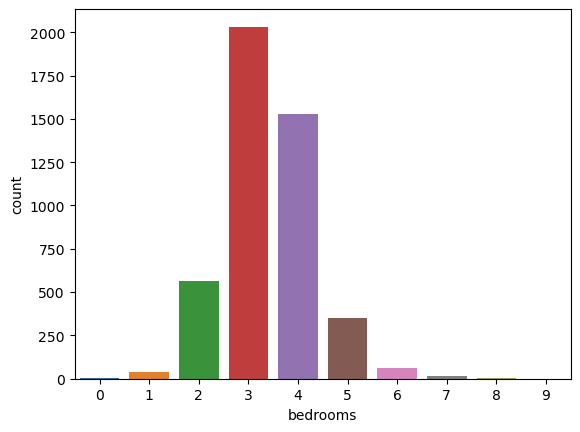

In [25]:
sns.countplot(data = df , x = 'bedrooms')

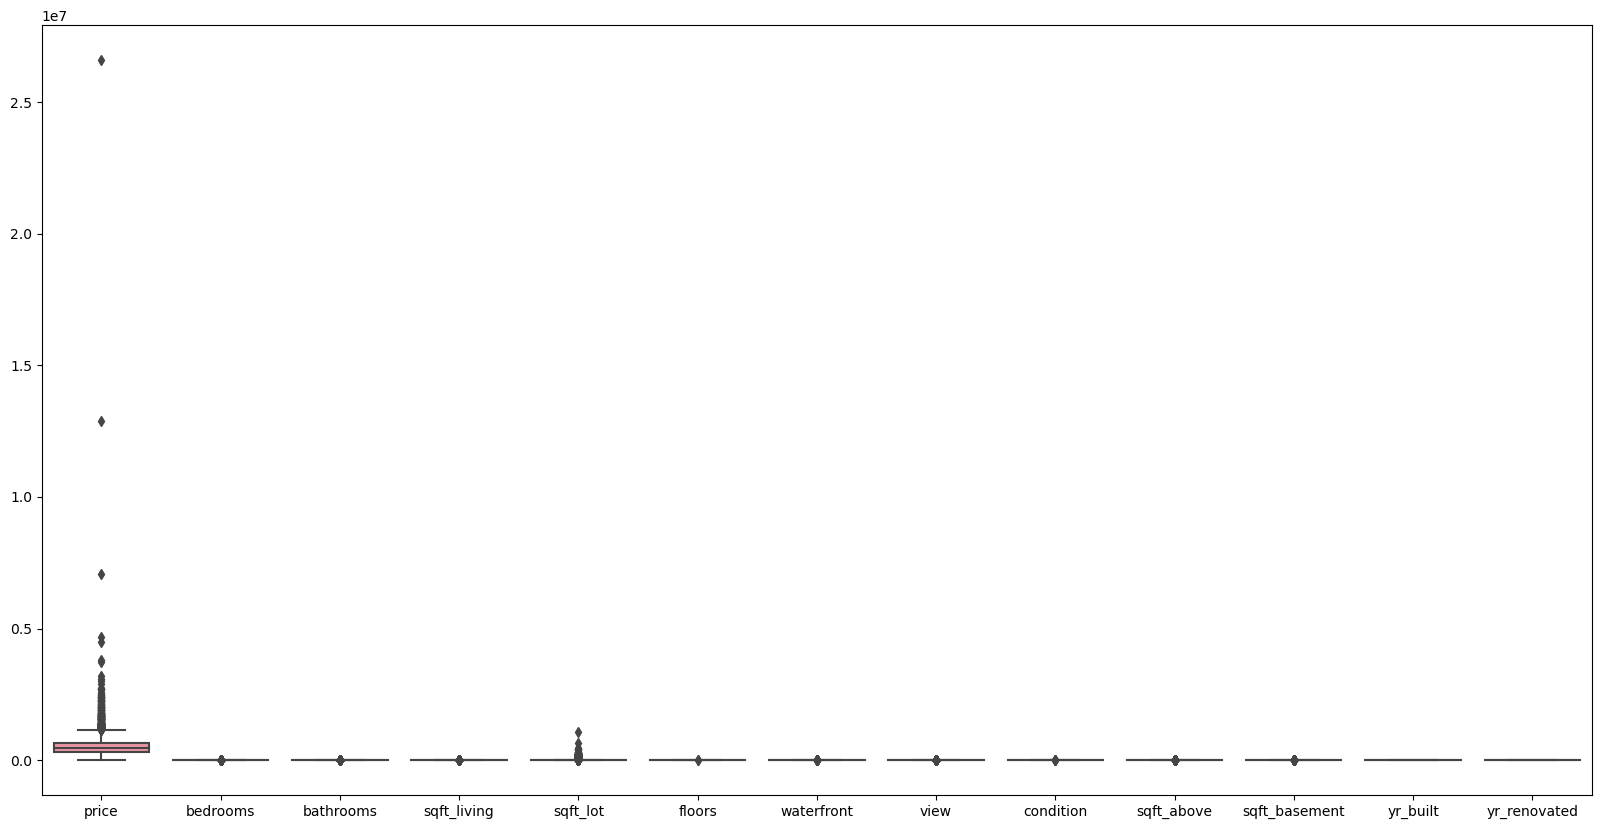

In [26]:
plt.figure(figsize = (20,10))
sns.boxplot(data = df)
plt.show()

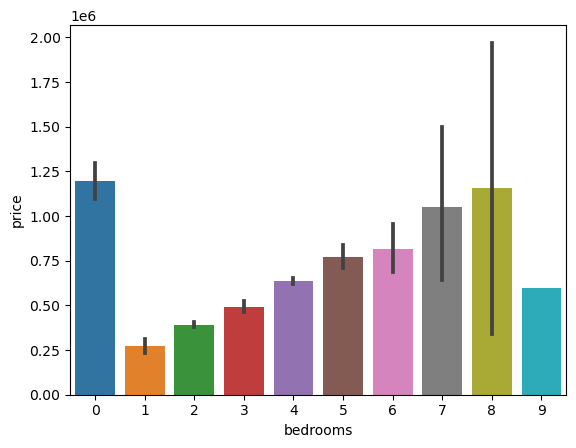

In [27]:
sns.barplot(data=df, x= 'bedrooms', y = 'price')
plt.show()

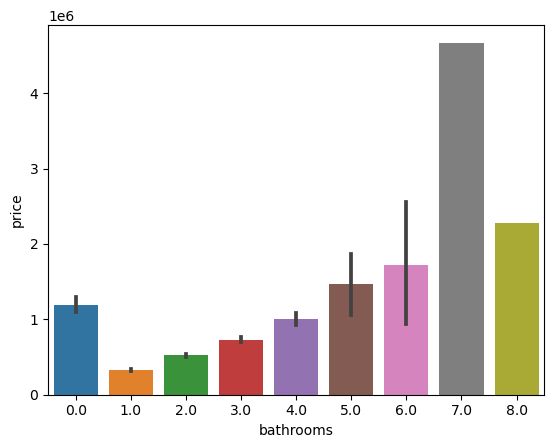

In [28]:
sns.barplot(data=df, x= 'bathrooms', y = 'price')
plt.show()

In [29]:
NUMERICAL_COLS = ['price', 'bedrooms', 'bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement']
categorical_cols = ['country', 'statezip', 'city', 'yr_renovated', 'yr_built']

In [30]:
def ApplyLabelEncoder(df, col_name):
    Le = LabelEncoder()
    df[col_name] = Le.fit_transform(df[col_name])
    return df

In [31]:
def HandleCategoricalData(df,le_cols):
    for col in le_cols: 
        df= ApplyLabelEncoder(df, col)
    return df

In [32]:
le_cols=['city']

In [33]:
df = HandleCategoricalData(df,le_cols)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3,2.0,1340,7912,2,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,36,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5,2.0,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,35,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3,2.0,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,18,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3,2.0,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,3,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4,2.0,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,31,WA 98052,USA


In [34]:
 def FixOutliers(df , col, threshold = {}, method = 'imputer', NUMERICAL_COLS = []):
    if NUMERICAL_COLS == []:
        NUMERICAL_COLS = data.columns
    if method == 'imputer': # you have converted outliers to nulls
        imputer = KNNImputer()
        df.loc[:, NUMERICAL_COLS] = imputer.fit_transform(df.loc[:, NUMERICAL_COLS])
    else:
        df.loc[:, col] = np.clip(df[col].values, threshold['low'], threshold['high'])
    return df.loc[:, col]

 def DetectOutlier_ZScore(df, col_name, method = 'imputer'):
    col_values = df.loc[:, col_name] # series object
    upper_limit = col_values.mean() + 3*col_values.std()
    lower_limit = col_values.mean() - 3*col_values.std()

    outliers = np.logical_or(col_values.values > upper_limit, col_values.values < lower_limit) # vector of booleans 
    idxs = np.where(outliers)[0]

    print(" Outliers Detected : ", len(idxs))

    plt.plot([upper_limit]*df.shape[0])
    plt.plot([lower_limit]*df.shape[0])
    plt.scatter(x = [i for i in range(df.shape[0])] , y = col_values)
    plt.xlabel("Data Points ")
    plt.ylabel(col_name)
    plt.title(f" Outliers in {col_name} ")
    plt.show()
    
    print(" Fixing Outliers ")
    if method == 'imputer':
        df.loc[idxs, col_name] = np.nan # converting outliers to nulls 
        df.loc[:, col_name] = FixOutliers(df, col_name, NUMERICAL_COLS = NUMERICAL_COLS)
    else:
        df.loc[:, col_name] = FixOutliers(df, col_name, threshold = {'high' : upper_limit, 'low' : lower_limit}, method = 'clipping')

    plt.plot([upper_limit]*df.shape[0])
    plt.plot([lower_limit]*df.shape[0])
    plt.scatter(x = [i for i in range(df.shape[0])] , y = df.loc[:, col_name].values)
    plt.xlabel("Data Points ")
    plt.ylabel(col_name)
    plt.title(f" Outliers in {col_name} ")
    plt.show()

    return df.loc[:, col_name]

 def DetectOutlier_IQR(df, col_name, method = 'imputer'):
    col_values = df.loc[:, col_name]
    q3 = col_values.quantile(0.75)
    q1 = col_values.quantile(0.25)
    upper_limit = q3 + 1.5*(q3 - q1)
    lower_limit = q1 - 1.5*(q3 - q1)

    # ((data[col_name] > upper_limit) | (data[col_name] < lower_limit)).sum()

    outliers = np.logical_or(col_values.values > upper_limit, col_values.values < lower_limit) # vector of booleans 
    idxs = np.where(outliers)[0]

    print(" Outliers Detected : ", len(idxs))

    plt.plot([upper_limit]*df.shape[0])
    plt.plot([lower_limit]*df.shape[0])
    plt.scatter(x = [i for i in range(df.shape[0])] , y = col_values)
    plt.xlabel("Data Points ")
    plt.ylabel(col_name)
    plt.title(f" Outliers in {col_name} ")
    plt.show()
    
    print(" Fixing Outliers ")
    if method == 'imputer':
        df.loc[idxs, col_name] = np.nan # converting outliers to nulls 
        df.loc[:, col_name] = FixOutliers(data, col_name, NUMERICAL_COLS = NUMERICAL_COLS)
    else:
        df.loc[:, col_name] = FixOutliers(data, col_name, threshold = {'high' : upper_limit, 'low' : lower_limit}, method = 'clipping')

    plt.plot([upper_limit]*df.shape[0])
    plt.plot([lower_limit]*df.shape[0])
    plt.scatter(x = [i for i in range(df.shape[0])] , y = df.loc[:, col_name].values)
    plt.xlabel("Data Points ")
    plt.ylabel(col_name)
    plt.title(f" Outliers in {col_name} ")
    plt.show()

    return df.loc[:, col_name]


 Outliers Detected :  34


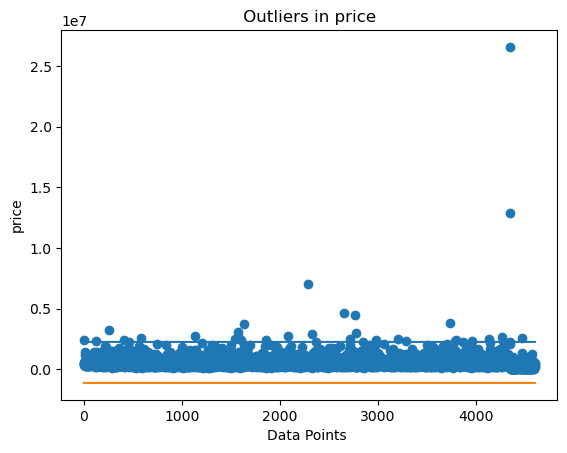

 Fixing Outliers 


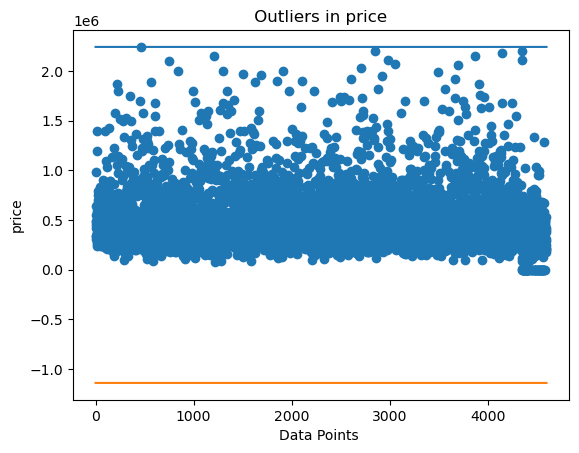

 Outliers Detected :  19


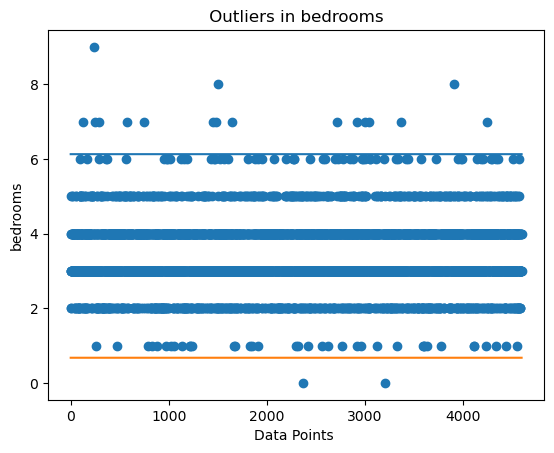

 Fixing Outliers 


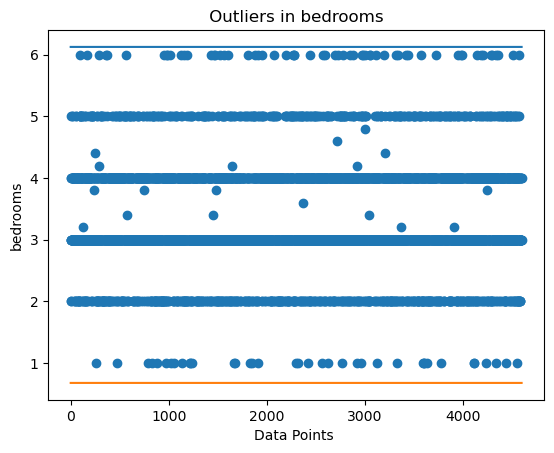

 Outliers Detected :  27


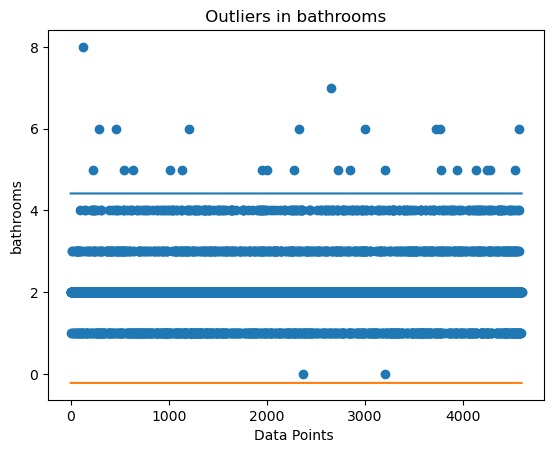

 Fixing Outliers 


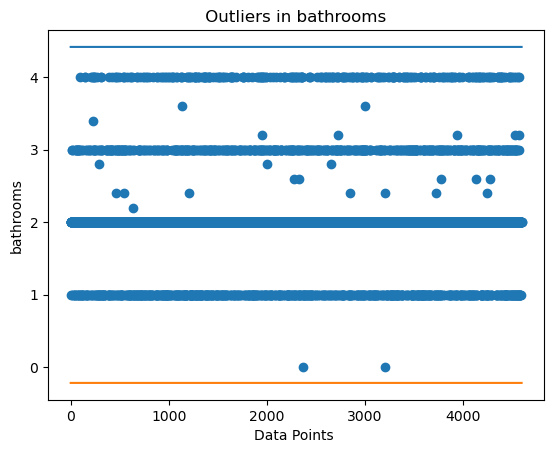

 Outliers Detected :  50


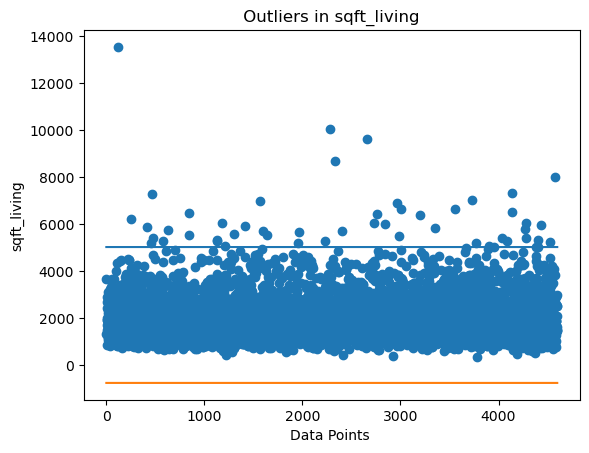

 Fixing Outliers 


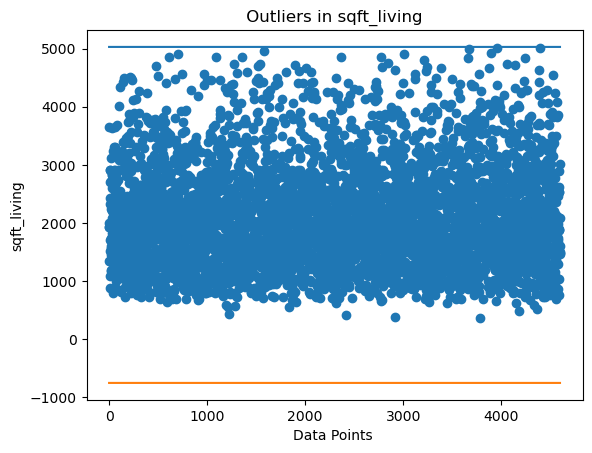

 Outliers Detected :  78


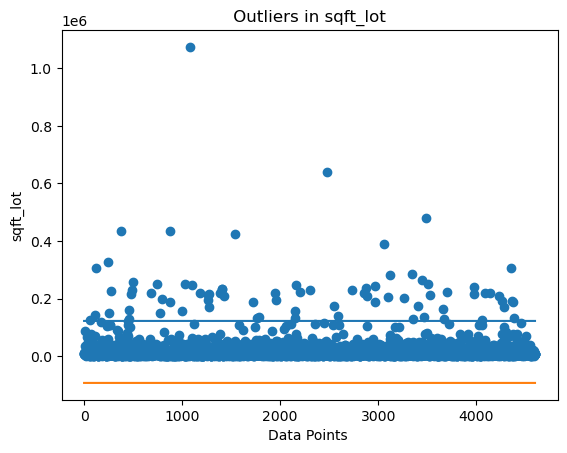

 Fixing Outliers 


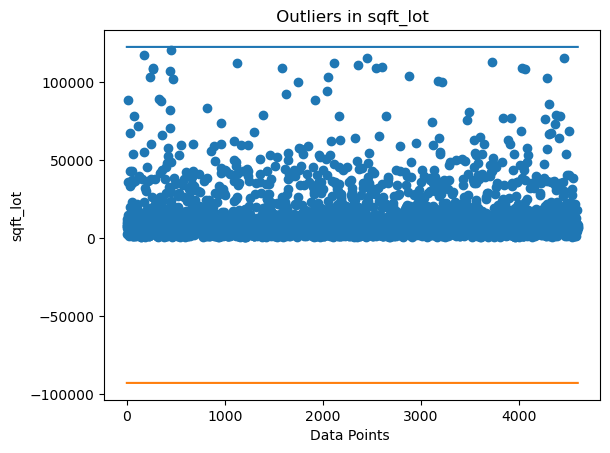

 Outliers Detected :  2


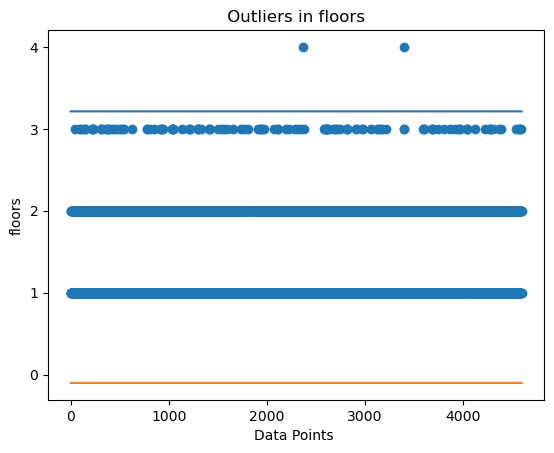

 Fixing Outliers 


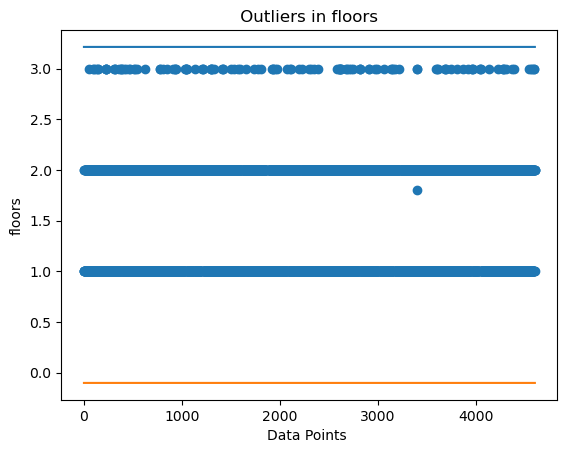

 Outliers Detected :  33


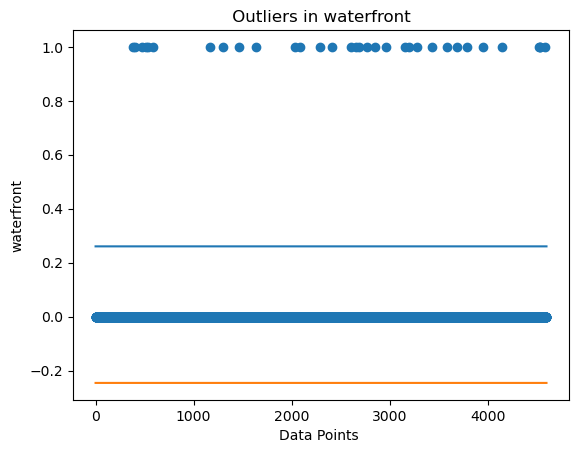

 Fixing Outliers 


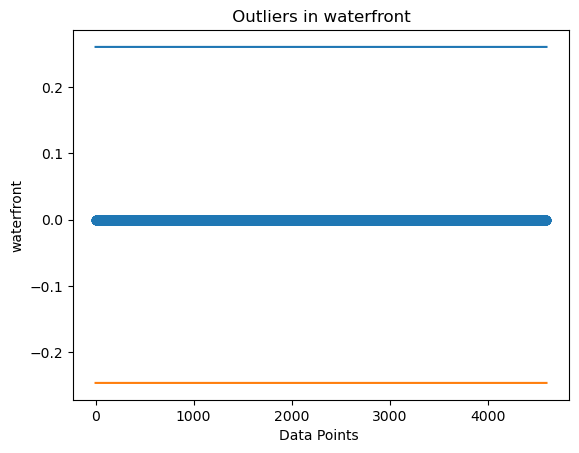

 Outliers Detected :  186


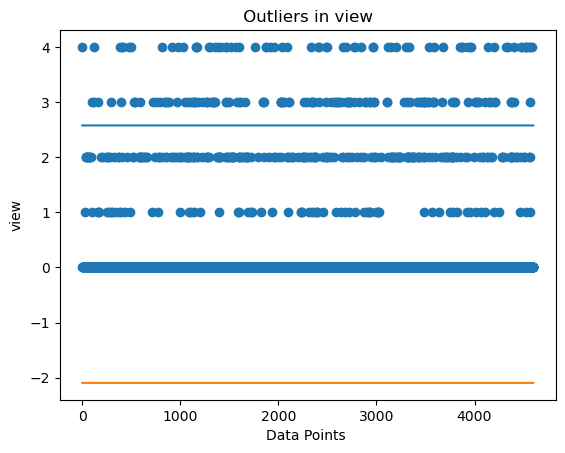

 Fixing Outliers 


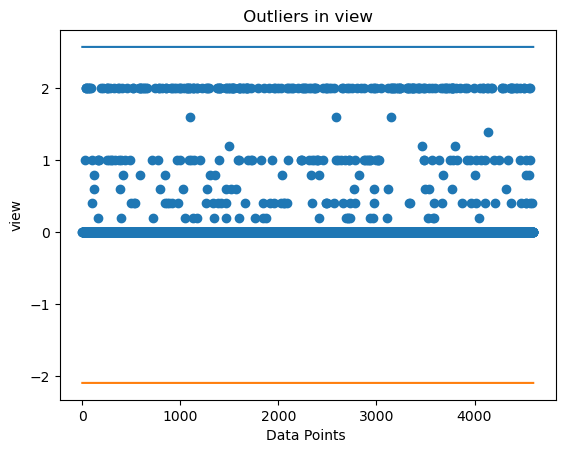

 Outliers Detected :  6


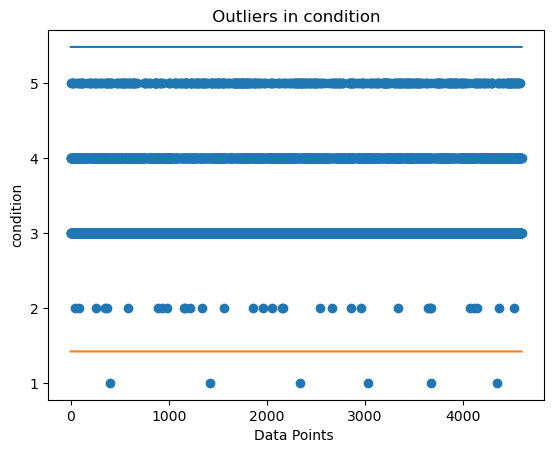

 Fixing Outliers 


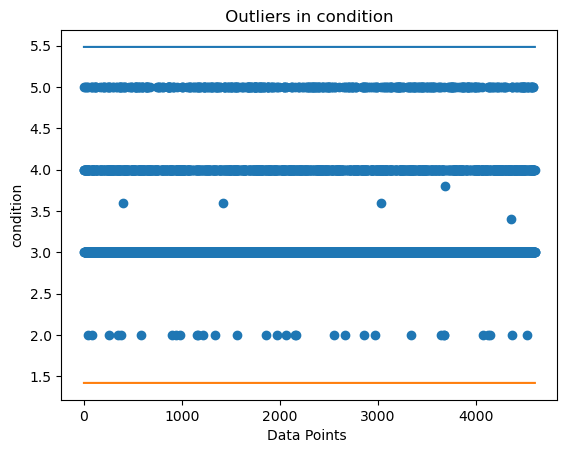

 Outliers Detected :  53


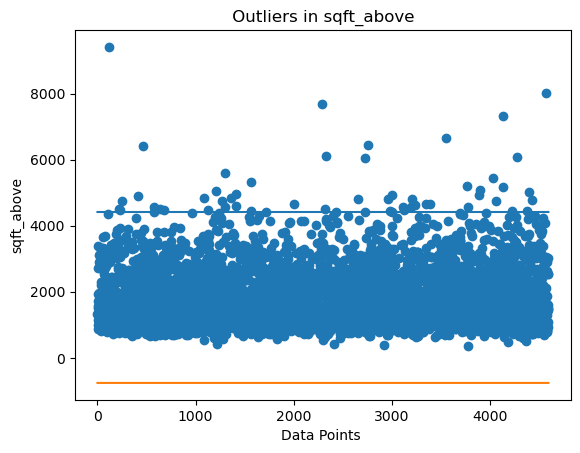

 Fixing Outliers 


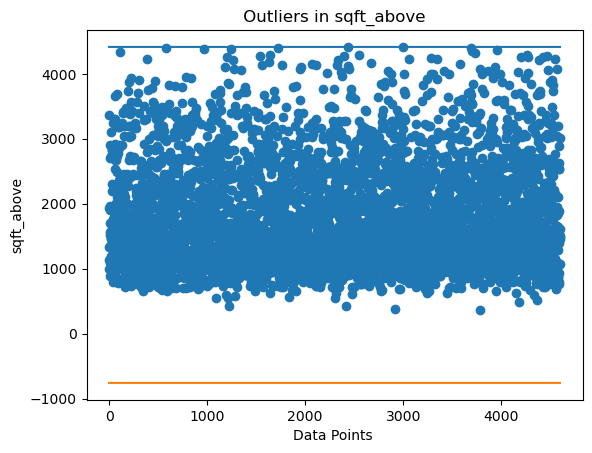

 Outliers Detected :  46


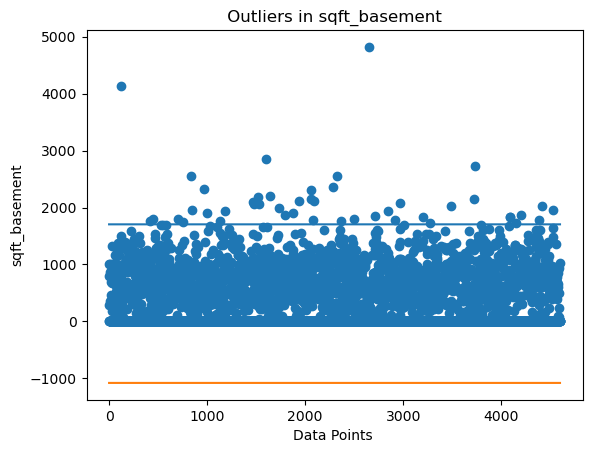

 Fixing Outliers 


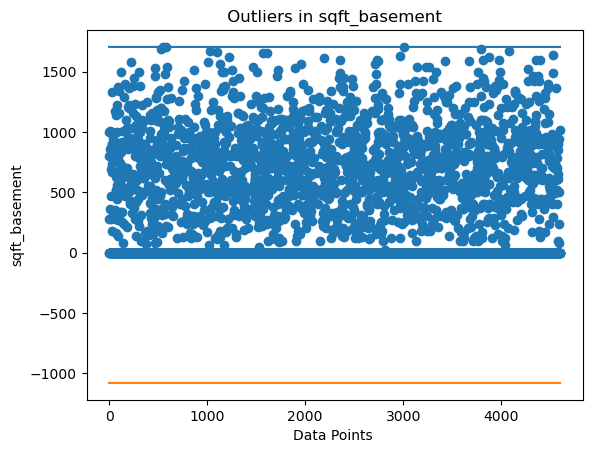

In [35]:
HandleOutlierCols = NUMERICAL_COLS

for col in HandleOutlierCols:
    df.loc[:, col] = DetectOutlier_ZScore(df, col)

In [36]:
df.drop(columns=["date",'street','statezip','country'],inplace=True,axis=1)
features = list(df.columns)
features.remove("price")

Features = df.loc[:, features]
Target = df.loc[:, "price"] #Target variable

In [37]:
features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'city']

In [38]:
Target

0       313000.000000
1       984800.000000
2       342000.000000
3       420000.000000
4       550000.000000
            ...      
4595    308166.666667
4596    534333.333333
4597    416904.166667
4598    203400.000000
4599    220600.000000
Name: price, Length: 4600, dtype: float64

In [39]:
Scaler = MinMaxScaler()
Features.iloc[:, :] = Scaler.fit_transform(Features)

# spliting data

In [40]:
TrainFeatures, TestFeatures, TrainTarget, TestTarget = train_test_split(Features, Target, test_size = 0.3, shuffle = True, random_state = 4)

# LinnerRegression Model

In [41]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(TrainFeatures, TrainTarget)

LinearRegression()

In [42]:
model = LinearRegression()
model.fit(TrainFeatures,TrainTarget)
predictions = model.predict(TestFeatures)

In [43]:
traing_accuracy=model.score(TrainFeatures,TrainTarget)
traing_accuracy

0.49710297261816283

In [44]:
test_accuracy=model.score(TestFeatures,TestTarget)
test_accuracy

0.45903790105165587

# RandomForestRegressor Model

In [45]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(TrainFeatures, TrainTarget)

RandomForestRegressor()

In [46]:
model = RandomForestRegressor()
model.fit(TrainFeatures,TrainTarget)
predictions = model.predict(TestFeatures)

In [47]:
traing_accuracy=model.score(TrainFeatures,TrainTarget)
test_accuracy=model.score(TestFeatures,TestTarget)
print(traing_accuracy)
print(test_accuracy)

0.9387368003017194
0.5357908879741118


# SVR Model

In [48]:
from sklearn.svm import SVR
model = SVR()
model.fit(TrainFeatures, TrainTarget)

SVR()

In [49]:
model = SVR()
model.fit(TrainFeatures,TrainTarget)
predictions = model.predict(TestFeatures)
traing_accuracy=model.score(TrainFeatures,TrainTarget)
test_accuracy=model.score(TestFeatures,TestTarget)
print(traing_accuracy)
print(test_accuracy)

-0.05128284833170693
-0.05311632279406364


# Ridge Model

In [50]:
from sklearn.linear_model import Ridge

In [51]:
model1 = Ridge()

In [52]:
model1.fit(TrainFeatures,TrainTarget)
predictions = model1.predict(TestFeatures)
traing_accuracy=model1.score(TrainFeatures,TrainTarget)
test_accuracy=model1.score(TestFeatures,TestTarget)
print(traing_accuracy)
print(test_accuracy)

0.49691308362648134
0.4595740479534838


# Lasso Model

In [53]:
from sklearn.linear_model import Lasso

In [54]:
model2 = Lasso()

In [55]:
model2.fit(TrainFeatures,TrainTarget)
predictions = model2.predict(TestFeatures)

In [56]:
traing_accuracy=model2.score(TrainFeatures,TrainTarget)
test_accuracy=model2.score(TestFeatures,TestTarget)
print(traing_accuracy)
print(test_accuracy)

0.49710296771854035
0.45904035721670977


# XGBRegresso Model

In [60]:
!pip install xgboost

     ---------------------------------------- 99.8/99.8 MB 8.5 MB/s eta 0:00:00


In [61]:
from xgboost import XGBRegressor

In [62]:
model3 = XGBRegressor()

In [63]:
model3.fit(TrainFeatures,TrainTarget)
predictions = model3.predict(TestFeatures)

In [64]:
traing_accuracy=model3.score(TrainFeatures,TrainTarget)
test_accuracy=model3.score(TestFeatures,TestTarget)
print(traing_accuracy)
print(test_accuracy)

0.971185853649344
0.4948721086366521


In [66]:
import pickle

In [67]:
pickle.dump(model3,open('model.pkl','wb'))